# Producer-Consumer Benchmark Analysis

This notebook analyzes the benchmark results from the producer-consumer implementation, visualizing how the average waiting time changes with different numbers of producers and consumers.

In [10]:
%pip install pandas matplotlib numpy seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme()
plt.rcParams['figure.figsize'] = [12, 6]

Note: you may need to restart the kernel to use updated packages.


In [11]:
df = pd.read_csv('benchmark_results.csv')

df['Average_Waiting_Time_us'] = df['Average_Waiting_Time_ms'] * 1000

## Visualization of Benchmark Results

The following graphs show how the average waiting time (in microseconds) changes with different numbers of consumers for each specific number of producers.

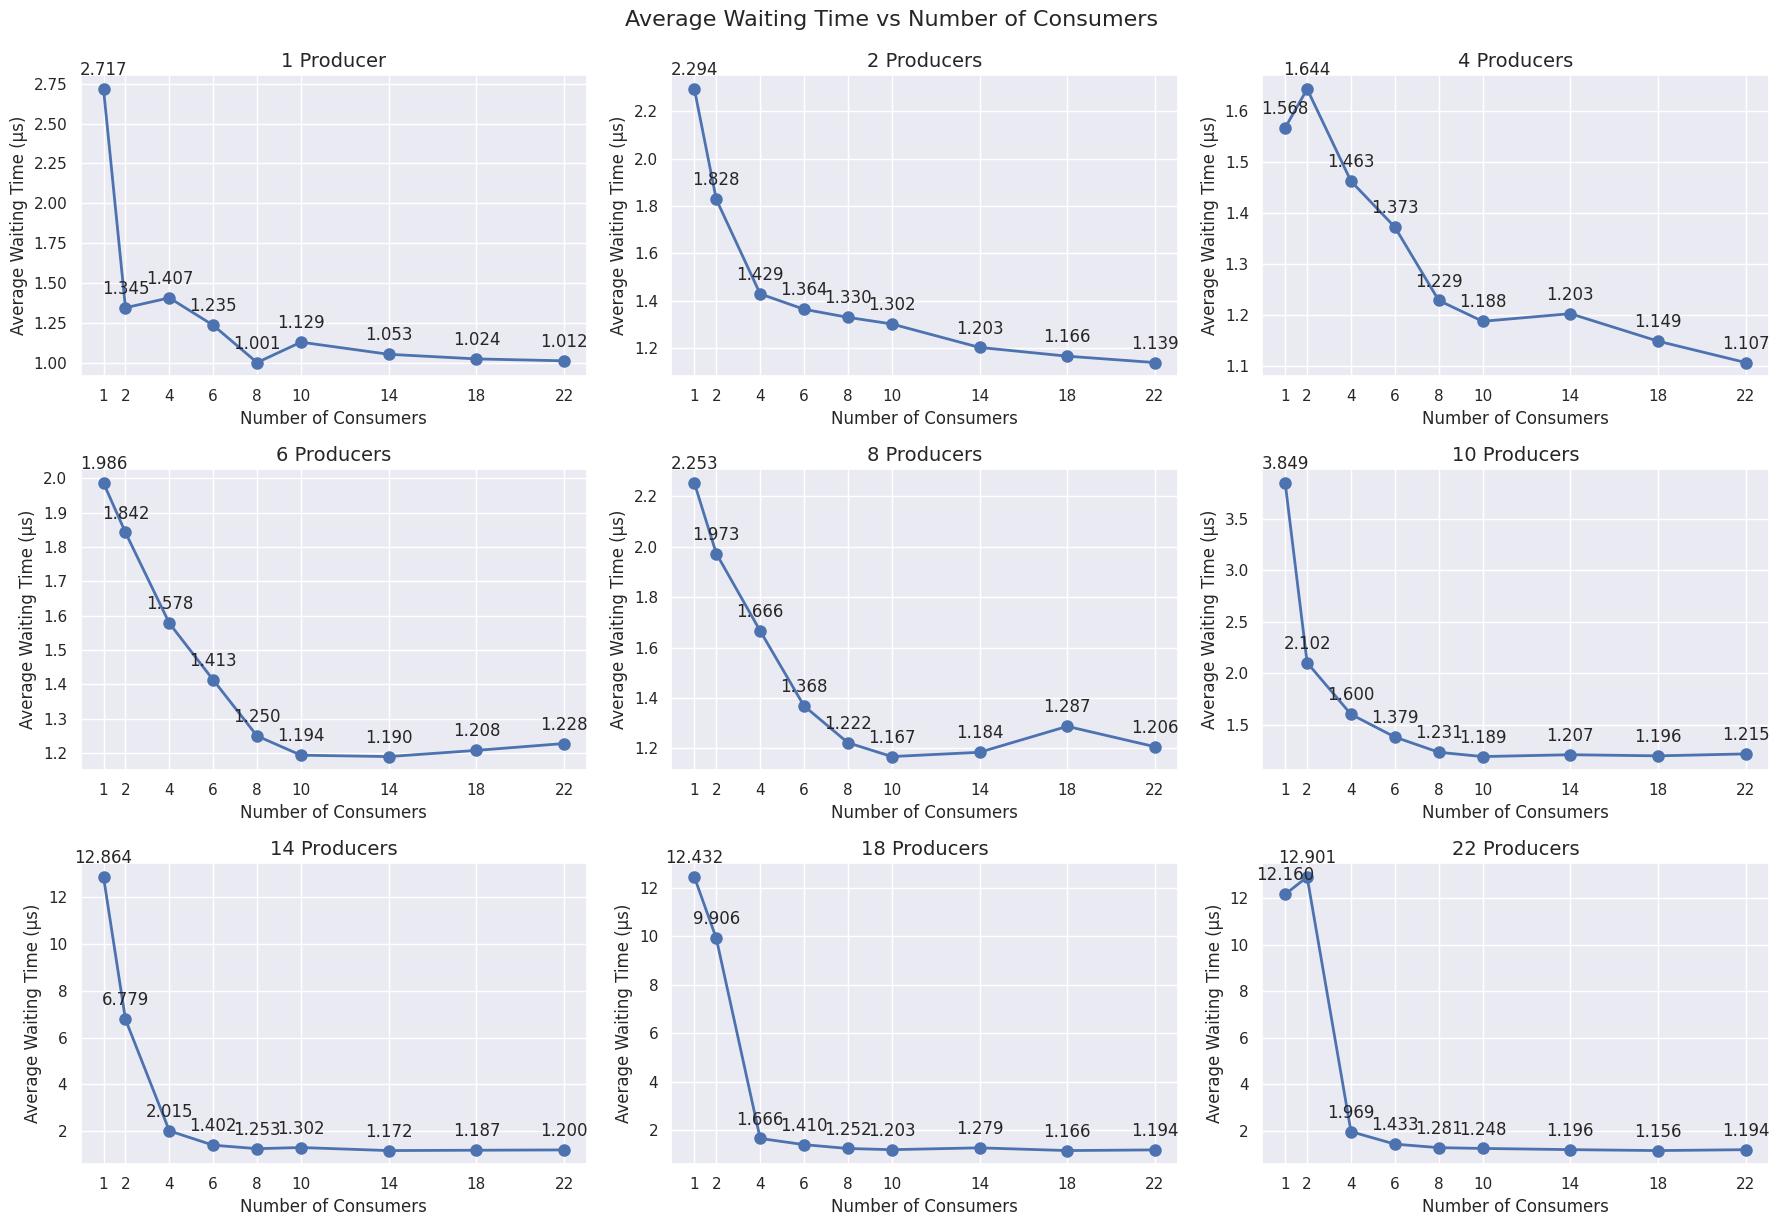

In [12]:
producer_counts = [1, 2, 4, 6, 8, 10, 14, 18, 22]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, producers in enumerate(producer_counts):
    producer_data = df[df['Producers'] == producers]
    
    ax = axes[i]
    ax.plot(producer_data['Consumers'], producer_data['Average_Waiting_Time_us'], 'o-', linewidth=2, markersize=8)
    ax.set_title(f"{producers} Producer{'s' if producers > 1 else ''}", fontsize=14)
    ax.set_xlabel('Number of Consumers', fontsize=12)
    ax.set_ylabel('Average Waiting Time (μs)', fontsize=12)
    ax.grid(True)
    
    ax.set_xticks(producer_data['Consumers'])
    
    for x, y in zip(producer_data['Consumers'], producer_data['Average_Waiting_Time_us']):
        ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", 
                   xytext=(0,10), ha='center')

plt.tight_layout()
plt.suptitle('Average Waiting Time vs Number of Consumers', fontsize=16, y=1.02)
plt.show()